In [78]:
from lsh import *
from utils import *
from query import *
import time
import seaborn
seaborn.set()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
k = 10
L = 2
d = 1024   #data dimensionality
N_queries = 25

# Ns = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
# Ns = [100, 500, 1000, 2000]
# for n in range(10000, 100000, 10000):
#     Ns.append(n)
    
Ns = []
for x in np.linspace(2, 5, 6):
    Ns.append(int(10**x))
print(Ns)

d1s = []
d2s = []
print("N, LSH, Linear ")
for n_idx, n in enumerate(Ns):
    G = data_generator(n=n,d=d,normalize=True)
    b = 200 #hash bits
    
    e = 2.9  #number of permutations
    M = round(2*n**(1/(1+e)))

    model = LSH(X=G.get_dataset(),b=b,M=M)

    t1 = time.time()
    for i in range(N_queries):
        model.approx_top_k(G.get_query(), k, L, refine="innerprod")
    t2 = time.time()
    duration1 = (t2-t1)/N_queries*1000
    
    t1 = time.time()
    for i in range(N_queries):
        model.exact_top_k(G.get_query(), k)
    t2 = time.time()
    duration2 = (t2-t1)/N_queries*1000
    
    print("{},{:6.3f}, {:6.3f}".format(n, duration1, duration2))
    d1s.append(duration1)
    d2s.append(duration2)
    



[100, 398, 1584, 6309, 25118, 100000]
N, LSH, Linear 
100, 0.574,  0.068
398, 0.616,  0.096
1584, 1.259,  0.547
6309, 1.867,  3.184
25118, 2.905, 13.780
100000,20.448, 60.224


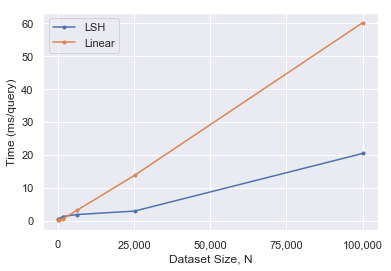

In [105]:
plt.plot(Ns, d1s, '.-', label="LSH")
plt.plot(Ns, d2s, '.-', label="Linear")
plt.xlabel("Dataset Size, N")
plt.ylabel("Time (ms/query)")
xs = np.arange(0,max(Ns)+1,25000)
plt.xticks(xs,[format(_,",") for _ in xs])
# plt.grid()
plt.legend()
# seaborn.set(style="ticks")
seaborn.set()
plt.savefig("time_vs_n", dpi=300)
plt.show()
